# Statistical and numerical methods in cosmology
# HW #7
### *Hernán E. Noriega B.*
### Instituto de Física, Universidad Nacional Autónoma de México

In [1]:
import numpy as np
import scipy
import scipy.special as sp
from scipy.integrate import quad
import math
import statistics
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## 1. Exercise: $\chi²$ & $\Delta \chi²$

Find the best parameters of a linear regression $f(x) = Ax + B$

where A and B are the parameters of the model

### 1.1 Visualization of the data

If all the off-diagonal terms are null (independence of data points),

$${ Cov }_{ ii }=\left< \left( { y }_{ i }^{ D }-E\left( { y }_{ i }^{ D } \right)  \right)  \right> \left( { y }_{ i }^{ D }-E\left( { y }_{ i }^{ D } \right)  \right) ={ \sigma  }_{ i }^{ 2 }$$

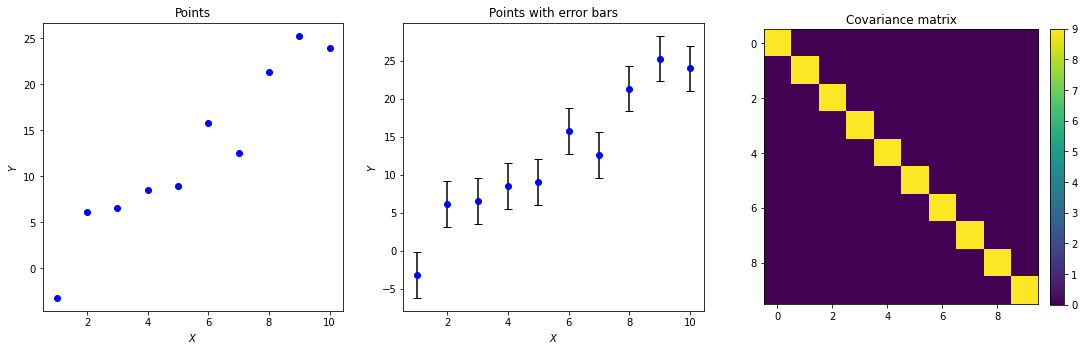

In [2]:
# 1,2. Reading the files

X, Y = np.loadtxt('Points_chi2_example_cov.txt',usecols = (0,1), unpack = True) #points
cov_arr = np.loadtxt('Covariance_chi2_example_cov.txt', unpack = True) #2. cov matrix

#3. Plot Y  vs X and the covariance matrix

fig, axs = plt.subplots(1, 3, figsize = (18.3, 5.3) )

#points
im1 = axs[0].scatter(X, Y, color = 'b') 
axs[0].set_title(r'Points')
axs[0].set_xlabel(r'$X$')
axs[0].set_ylabel(r'$Y$')

#4. Do the same plot as in #3, but including the error bars

error_arr = np.sqrt(np.diagonal(cov_arr)) #error bars (standard deviations)
#points with error vars
im2 = axs[1].errorbar(X, Y, yerr=error_arr,color='b', ecolor='k', fmt='o', capsize=4);
axs[1].set_title(r'Points with error bars')
axs[1].set_xlabel(r'$X$')
axs[1].set_ylabel(r'$Y$')

#covariance matrix
im3 = axs[2].imshow(cov_arr) 
fig.colorbar(im3, fraction = 0.046, pad = 0.04, ax = axs[2])
axs[2].set_title(r'Covariance matrix')

plt.show()

### 1.2 Find best fit parameters

Remember,
$${ \chi  }^{ 2 }=\cfrac { 1 }{ 2 } { \overrightarrow { V }  }^{ T }{ Cov }^{ -1 }\overrightarrow { V } $$

where $\overrightarrow { V } = A_{rr}[ii]*X + B_{arr}[jj]-Y$  is a column vector, while ${ \overrightarrow { V }  }^{ T }$ is the transpose and ${ Cov }^{ -1 }$ is the inverse matrix of $Cov$

In [3]:
#5. Create A_arr and B_arr, spaced by = 0.1 in [-6,4]
#6. Generate a 2D-array, named chi2_arr

v_i = -6 #inferior value
v_f = 4 #"final" value

A_arr = B_arr = np.linspace(v_i, v_f, num = 101) #A(B)_arr ϵ [-6,4]
chi2_arr = np.zeros((len(A_arr),len(B_arr))) #6. chi2_arr 

#7. Evaluate chi2_arr[ii,jj]

cov_inv_arr = np.linalg.inv(cov_arr) #cov_in_arr: inverse matrix of "cov_arr"

for ii in range(len(A_arr)):
    for jj in range(len(B_arr)):
        #we reshape in order to get the column vector 
        V_arr = np.reshape(A_arr[ii] * X + B_arr[jj] - Y, (len(X),1)) 
        #V_arr.T is the transpose
        chi2_arr[ii][jj] = 0.5 * np.linalg.multi_dot([V_arr.T, cov_inv_arr, V_arr])
        
#8. Find the best fit parameters and the value of this best χ² /N_dof 

N_points = len(X) #number of points
N_params = 2 #number of parameters (A and B)
N_dof = N_points - N_params #number of degree of freedom

#we use np.where to find the min of chi2_arr
chi2_min = np.amin(chi2_arr)
best_par = np.where(chi2_arr == chi2_min) 
A_best = A_arr[89]
B_best = B_arr[26]
print('(A_best, B_best):', best_par)
print('(A_best, B_best):', (A_best, B_best))
print('chi2_min:', chi2_min)


#What's the value of this best χ² /N_dof? Is it acceptable?
best_value = chi2_min/N_dof 
print('χ² /N_dof:',best_value)
#It's acceptable

(A_best, B_best): (array([89]), array([26]))
(A_best, B_best): (2.9000000000000004, -3.4)
chi2_min: 3.3509973714094703
χ² /N_dof: 0.4188746714261838


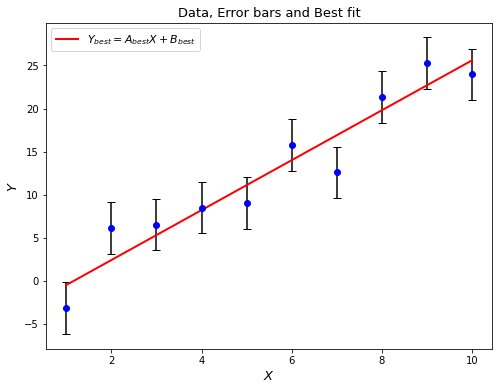

In [4]:
#9. Plot  X,Y with errorbar() and add the best fit model.

Y_best = A_best * X + B_best #best fit

plt.figure(figsize = (8,6))
plt.title(r'Data, Error bars and Best fit',fontsize = 13)
plt.xlabel(r'$X$',fontsize = 13)
plt.ylabel(r'$Y$',fontsize = 13)

plt.errorbar(X, Y, yerr = error_arr, color = 'b', ecolor='k', fmt='o', capsize = 4)
plt.plot(X, Y_best, color='r', ls='-', lw=2, label=r'$Y_{best}=A_{best}X + B_{best}$')
plt.legend(fontsize = 11 , loc = 2)

plt.show()

### 1.3 Confidence contours

we consider,

$$\Delta \chi^2 = \chi^2 - min(\chi^2)$$

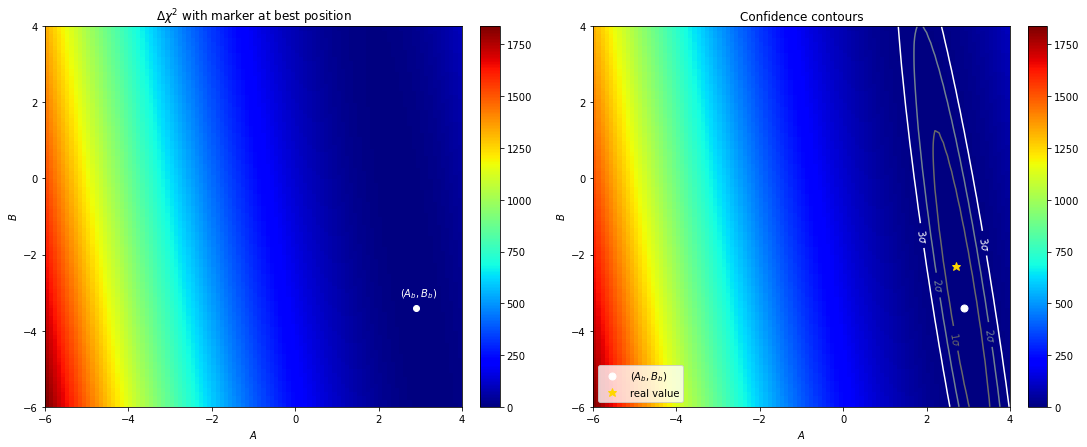

In [5]:
#10. Generate Delta_chi2_arr

Delta_chi2_arr = chi2_arr - chi2_min

#11. Do a pcolormesh (new array), add a marker at the best parameters value position
#12. Generate the contour plot using the values for N_params = 2 and 1, 2, 3σ

sigma_1 = 2.30
sigma_2 = 6.17
sigma_3 = 11.8
levels = [sigma_1, sigma_2, sigma_3] #confidence levels

#given at HW#7
A_real = 2.7
B_real = -2.3

fig, axs = plt.subplots(1, 2, figsize = (18,7))

im1 = axs[0].pcolormesh(A_arr, B_arr, Delta_chi2_arr.T, cmap = 'jet');
fig.colorbar(im1, fraction = 0.046, pad = 0.04, ax = axs[0])
axs[0].plot(A_best, B_best, 'ow');
axs[0].text(A_best - 0.4, B_best + 0.3, '$(A_{b}, B_{b})$', color = 'white'); 
axs[0].set_title(r'$\Delta \chi^2$ with marker at best position')
axs[0].set_xlabel(r'$A$')
axs[0].set_ylabel(r'$B$')

im2 = axs[1].pcolormesh(A_arr, B_arr, Delta_chi2_arr.T, cmap = 'jet')
fig.colorbar(im2, fraction = 0.046, pad = 0.04, ax = axs[1])

CS = plt.contour(A_arr, B_arr, Delta_chi2_arr.T, levels, 
                 colors = ('dimgray', 'slategray', 'w'))

fmt = {}
strs = ['$1 \sigma$', '$2 \sigma$', '$3 \sigma$']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
    
axs[1].clabel(CS, levels, inline = True, fmt = fmt, fontsize = 10)
axs[1].plot(A_best, B_best, 'ow', ms = 7, label = '$(A_{b}, B_{b})$'); 
axs[1].plot(A_real, B_real, '*', color = 'gold', ms = 9, label = 'real value'); 

axs[1].set_title(r'Confidence contours')
axs[1].set_xlabel(r'$A$')
axs[1].set_ylabel(r'$B$')
axs[1].legend(loc = 'lower left')

plt.show()

## 2. Exercise: Calculate p-values for distinct $\chi²$

You will generate the probability distribution function, using the gamma and incomplete gamma functions, for
the $χ²$ for different number of degree of freedom. Calculate the p-values for the corresponding best $χ²$ values,which correspond to results we get in our last analysis:

Regularized lower incomplete gamma function is defined, 

$$P(a,s)\quad =\quad \frac { 1 }{ \Gamma (a) } \int _{ 0 }^{ s }{ { t }^{ a-1 }{ e }^{ -t }dt }, $$

here $a=k/2$

see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gammainc.html

In [6]:
#we define the eq. 64 at Chi2, notes

def P(k,s):
    return sp.gammainc(k/2, s/2)

#Given by the exercise

chi2_arr = np.array((25.1, 25.0, 41.5, 30.3, 28.1, 60.1)) #s
N_dof = np.array((16, 18, 20, 23, 25, 33)) #k
p_val = 1 - P(N_dof, chi2_arr) 

In [7]:
#Calculate the p-values

print("χ²", "", "",  "N_dof", "", "", "p_value");

for ii in range(len(N_dof)):
    print(chi2_arr[ii], "", "",  N_dof[ii], "", "", p_val[ii])

χ²   N_dof   p_value
25.1   16   0.06808184251741012
25.0   18   0.12491619694467049
41.5   20   0.0032115047864634816
30.3   23   0.1409819481985377
28.1   25   0.30327028608476203
60.1   33   0.002696810267838523


Another way to obtain the p-values is integrating the equations, as we present below

In [8]:
# p-values for the corresponding best  χ²  values (esults we get in our last analysis)

def p(x, k, s):
    return 1/( 2**(k/2) * sp.gamma(k/2) ) * x**(k/2 - 1) * np.exp(-x/2) 

def P(k, s):
    return quad(p, 0, s, args = (k, s))[0]  # [0]:we only take the value of P(k,s)

In [9]:
p_values = np.zeros((len(N_dof)))

#Calculate the p-values
for ii in range(len(N_dof)):
    p_values[ii] = 1 - P(N_dof[ii], chi2_arr[ii])

In [10]:
print("χ²", "", "",  "N_dof", "", "", "p_value");

for ii in range(len(N_dof)):
    print(chi2_arr[ii], "", "",  N_dof[ii], "", "", p_values[ii])

χ²   N_dof   p_value
25.1   16   0.06808184251741012
25.0   18   0.1249161969446706
41.5   20   0.0032115047864632595
30.3   23   0.14098194819853793
28.1   25   0.3032702860847609
60.1   33   0.002696810267838856


both result are pretty similar